<a href="https://colab.research.google.com/github/RenanAbreuC/Iris-Species-Classification/blob/main/Iris_Species_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto: Iris Species Classification**

Elaborado por [Renan Abreu](www.linkedin.com/in/renanabreuc).

Data 07/06/2025

## **Objetivo do Projeto:**
Realizar a classificação das espécies de flores do dataset Iris (*Setosa*, *Versicolor* e *Virginica*) com base em suas características (comprimento e largura de pétalas e sépalas).

Este projeto tem como finalidade aplicar os conhecimentos adquiridos em Ciência de Dados e Aprendizado de Máquina, comparando o desempenho de dois modelos distintos:

- Árvore de Decisão (Decision Tree)
- Regressão Logística (Logistic Regression)

Além disso, o projeto aborda etapas essenciais como visualização, pré-processamento, treinamento, teste e análise de métricas para escolha do modelo mais adequado.

Amostra dos Dados: 
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa 

Informações do Dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None 



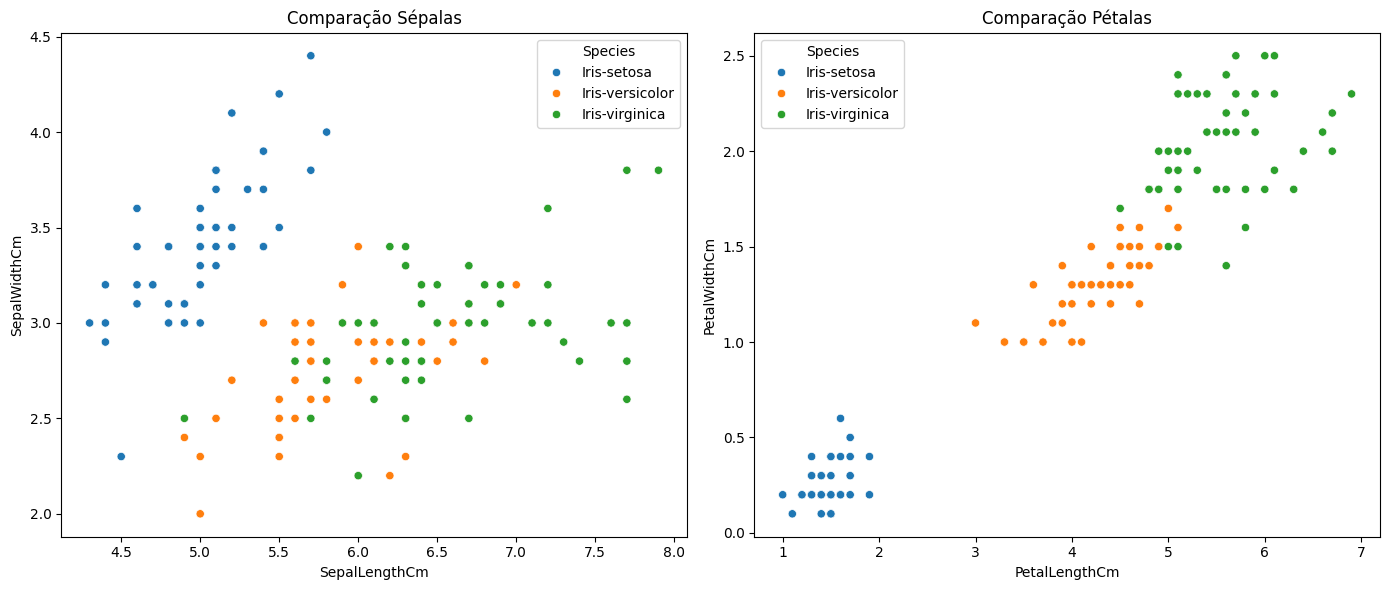

Pós-processamento: 
<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  147 non-null    float64
 1   SepalWidthCm   147 non-null    float64
 2   PetalLengthCm  147 non-null    float64
 3   PetalWidthCm   147 non-null    float64
 4   Species        147 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.9 KB
None
Contagem de Valores Nulos:  SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
Contagem de Linhas Duplicadas:  0

Validação Cruzada (Decision Tree):
Scores: [0.95833333 0.95833333 0.95652174 0.91304348 0.95652174]
Acurácia Média: 0.9485507246376812

Validação Cruzada (Logistic Regression):
Scores: [0.95833333 0.95833333 0.95652174 1.         0.95652174]
Acurácia Média: 0.9659420289855072

Avaliação - Decision Tree:
Acurácia: 0.8333333333333334
Matriz de Con

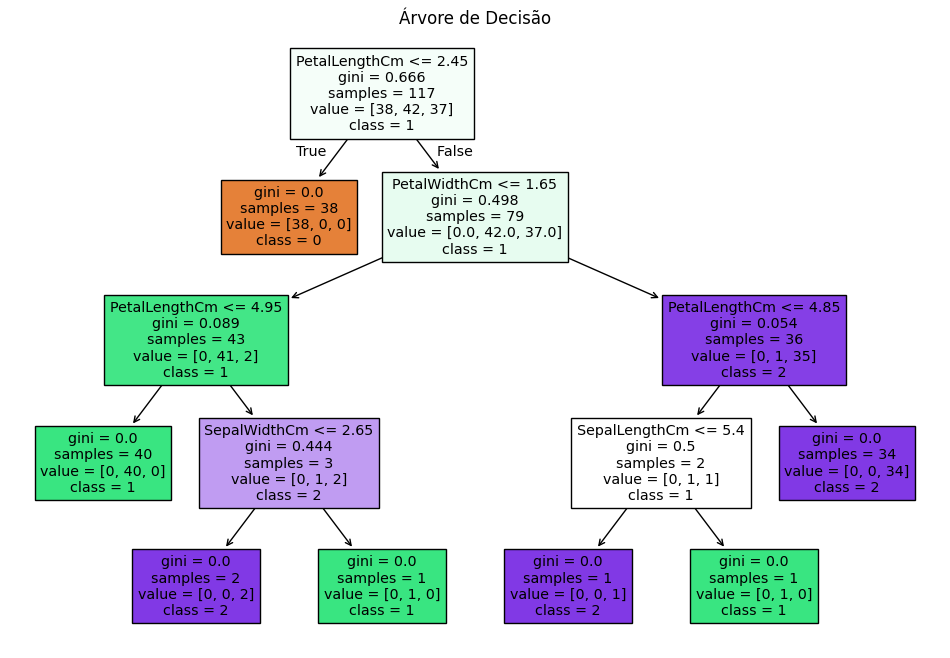


Avaliação - Logistic Regression:
Acurácia: 0.9333333333333333
Matriz de Confusão:
 [[10  0  0]
 [ 0  7  1]
 [ 0  1 11]]
Relatório:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.88      0.88         8
           2       0.92      0.92      0.92        12

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [23]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


class IrisModel():
  """Classe que engloba o fluxo completo de análise do dataset Iris."""

  def __init__(self, path):
    self.path = path
    self.df = None
    self.x_train = None
    self.x_test = None
    self.y_train = None
    self.y_test = None
    self.model_tree = DecisionTreeClassifier() # Modelo - Árvore de Decisão.
    self.model_logreg = LogisticRegression(max_iter=1000) # Modelo - Regressão Logística.
    self.labels = None

  def LoadDataset(self):
    """Carrega o dataset com as colunas renomeadas."""
    column_names = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "Species"]
    self.df = pd.read_csv(self.path, names=column_names) # Lê o CSV com os nomes definidos.

  def DataVisualization(self):
    """Exibe as informações iniciais e gráficos de comparação."""
    print("Amostra dos Dados: ")
    print(self.df.head(), "\n")

    print("Informações do Dataset: ")
    print(self.df.info(), "\n")

    species = self.df["Species"]

    # Gráficos de dispersão para comparações.
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    sns.scatterplot(data=self.df, x="SepalLengthCm", y="SepalWidthCm", hue=species, ax=axes[0])
    axes[0].set_title("Comparação Sépalas")

    sns.scatterplot(data=self.df, x="PetalLengthCm", y="PetalWidthCm", hue=species, ax=axes[1])
    axes[1].set_title("Comparação Pétalas")

    plt.tight_layout()
    plt.show()

  def DataProcessing(self):
    """Limpeza de dados nulos/duplicados."""
    self.df.drop_duplicates(inplace=True) # Remove linhas duplicadas.
    self.df.dropna(inplace=True) # Remove valores nulos.
    self.df["Species"], self.labels = pd.factorize(self.df["Species"]) # Transforma coluna de espécies em números.

    print("Pós-processamento: ")
    print(self.df.info())
    print("Contagem de Valores Nulos: ", self.df.isnull().sum())
    print("Contagem de Linhas Duplicadas: ", self.df.duplicated().sum(),)

  def DataTraining(self):
    """Treina os modelos e executa a validação cruzada."""
    X = self.df.drop("Species", axis=1)
    y = self.df["Species"]

    # Divide os dados de treino e teste.
    self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(X, y, test_size= 0.2, random_state = 11)

    # Treina modelos com dados de treino.
    self.model_tree.fit(self.x_train, self.y_train)
    self.model_logreg.fit(self.x_train, self.y_train)

    # Validação cruzada para avaliar modelos.
    tree_scores = cross_val_score(self.model_tree, self.x_train, self.y_train, cv=5)
    logreg_scores = cross_val_score(self.model_logreg, self.x_train, self.y_train, cv=5)

    print("\nValidação Cruzada (Decision Tree):")
    print("Scores:", tree_scores)
    print("Acurácia Média:", tree_scores.mean())

    print("\nValidação Cruzada (Logistic Regression):")
    print("Scores:", logreg_scores)
    print("Acurácia Média:", logreg_scores.mean())

  def Test(self):
    """Testa os modelos treinados."""
    # Realiza previsões com os dados de teste.
    pred_tree = self.model_tree.predict(self.x_test)
    pred_logreg = self.model_logreg.predict(self.x_test)

    print("\nAvaliação - Decision Tree:")
    print("Acurácia:", accuracy_score(self.y_test, pred_tree))
    print("Matriz de Confusão:\n", confusion_matrix(self.y_test, pred_tree))
    print("Relatório:\n", classification_report(self.y_test, pred_tree))

    plt.figure(figsize=(12, 8))
    plot_tree(self.model_tree, feature_names=self.x_train.columns, class_names=self.model_tree.classes_.astype(str), filled=True)
    plt.title("Árvore de Decisão")
    plt.show()

    print("\nAvaliação - Logistic Regression:")
    print("Acurácia:", accuracy_score(self.y_test, pred_logreg))
    print("Matriz de Confusão:\n", confusion_matrix(self.y_test, pred_logreg))
    print("Relatório:\n", classification_report(self.y_test, pred_logreg))

  def Train(self):
    """Executa o fluxo completo de treinamento."""
    self.LoadDataset()
    self.DataVisualization()
    self.DataProcessing()
    self.DataTraining()

# Instancia o modelo e executa treinamento e testes
modelo = IrisModel("/content/iris-data.csv")
modelo.Train()
modelo.Test()

## **Conclusão:**

A análise comparativa entre os modelos de Regressão Logística e Árvore de Decisão demonstrou um desempenho maior do modelo de Regressão Logística em todas as métricas relevantes, apresentando uma estabilidade maior.

### Acurácia na validação cruzada:

- Decision Tree: 94,85%
- Logistic Regression: **96,59%**

### Relatório de Classificação:

Logistic Regression manteve métricas equilibradas e consistentes para todas as classes. Por outro lado, Decision Tree teve recall mais baixo na classe 2, mostrando maior dificuldade em identificar corretamente essa classe.

### **Conclusão Final:**

Com base nos resultados obtidos, o modelo mais indicado para a tarefa de classificação do dataset Iris é o **Logistic Regression (Regressão Logística)**.